In [ ]:
%pip install python-dotenv
%pip install langchain-pinecone langchain-openai langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.3/524.3 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing

In [ ]:
import getpass
import os


def _set_env(key: str):
    if key not in os.environ:
        os.environ[key] = getpass.getpass(f"{key}:")


_set_env("OPENAI_API_KEY")
_set_env("PINECONE_API_KEY")
_set_env("PINECONE_ENVIRONMENT")

OPENAI_API_KEY:··········
PINECONE_API_KEY:··········
PINECONE_ENVIRONMENT:··········


In [ ]:
from dotenv import load_dotenv

load_dotenv()

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import ReadTheDocsLoader
from langchain_openai import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
loader = ReadTheDocsLoader("https://www.edubull.com/Content/eRepository/SubjectContent/Notes/3634.pdf")
raw_documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=50)
documents = text_splitter.split_documents(raw_documents)
for doc in documents:
    new_url = doc.metadata["source"]
    doc.metadata.update({"source": new_url})
retriever = PineconeVectorStore.from_documents(
    documents, embeddings, index_name="project2"
).as_retriever()


In [ ]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    name="search_docs",
    description="Search the knowledge base."
)

In [ ]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.8 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import MessagesState
from langchain_openai import ChatOpenAI

response_model = ChatOpenAI(model="gpt-4o", temperature=0)


def generate_query_or_respond(state: MessagesState):
    """Call the model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply respond to the user.
    """
    response = (
        response_model
        .bind_tools([retriever_tool]).invoke(state["messages"])
    )
    return {"messages": [response]}

In [ ]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

Hello! How can I assist you today?


In [ ]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "How was cricket spread in India?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  search_docs (call_h31nIAW9VdOg8Bj081MaAIjm)
 Call ID: call_h31nIAW9VdOg8Bj081MaAIjm
  Args:
    query: spread of cricket in India


In [ ]:
from pydantic import BaseModel, Field
from typing import Literal
from langchain_openai import ChatOpenAI

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "Instructions:\n"
    "- Return 'yes' if the document clearly answers the question.\n"
    "- If the document touches the topic or answers part of the question, return 'partially relevant'.\n"
    "- If the document does not answer the question at all, return 'no'.\n"
    "Return only one of these values exactly: 'yes', 'partially relevant', or 'no'. Do not include explanations."

)
class GradeDocuments(BaseModel):
    """Grade documents using a binary score for relevance check."""
    binary_score: Literal["yes", "partially relevant", "no"] = Field(
        description="Relevance score: 'yes' if clearly relevant, 'partially relevant' if loosely related, 'no' if unrelated"
    )
grader_model = ChatOpenAI(model="gpt-4o", temperature=0)

def grade_documents(
    state: MessagesState,
) -> Literal["generate_answer", "rewrite_question","ignore_question"]:
    """Determine whether the retrieved documents are relevant to the question."""
    question = state["messages"][0].content
    context = state["messages"][-1].content

    prompt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model
        .with_structured_output(GradeDocuments).invoke(
            [{"role": "user", "content": prompt}]
        )
    )
    score = response.binary_score

    if score == "yes":
        return "generate_answer"
    elif score == "partially relevant":
        return "rewrite_question"
    else:
      return "ignore_question"

In [ ]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {"role": "tool", "content": "capital of India", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

'ignore_question'

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

'rewrite_question'

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "events that contributed to the spread of cricket in India?",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

'generate_answer'

In [ ]:
IGNORE_PROMPT = (
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Here is the document:\n"
    "{context}\n\n"
    "If the document is not at all related to the question, respond with:\n"
    "'The question is not related to the document provided.'\n"
)
def ignore_question(state: MessagesState):
    """Ignore user question."""
    """Return 'Not relevant' if the document is not relevant at all."""
    messages = state["messages"]
    question = messages[0].content
    context = messages[-1].content
    prompt = IGNORE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [ ]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: MessagesState):
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [ ]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use three sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [ ]:
from langchain_core.messages import AIMessage

def iterate_until_answerable(input_state, max_rewrites=3, verbose=True):
    state = input_state
    rewrite_attempts = 0
    rewrite_history = []

    while rewrite_attempts <= max_rewrites:
        result = grade_documents(state)

        if result == "generate_answer":
            if verbose:
                print(f"Suitable for answering after {rewrite_attempts} rewrite(s).")
            return generate_answer(state)

        elif result == "rewrite_question":
            if rewrite_attempts < max_rewrites:
                rewritten_dict = rewrite_question(state)["messages"][0]
                rewritten_msg = AIMessage(content=rewritten_dict["content"])
                state = {"messages": state["messages"] + [rewritten_msg]}
                rewrite_history.append(rewritten_msg.content)
                if verbose:
                    print(f"Rewrite {rewrite_attempts + 1}: {rewritten_msg.content}")
                rewrite_attempts += 1
            else:
                if verbose:
                    print("Max rewrites reached. Forcing an answer...")
                return generate_answer(state)

        else:
            if verbose:
                print("Question irrelevant to the document. Ignoring.")
            return ignore_question(state)


In [ ]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}
ans = grade_documents(input)
print(ans)
response = iterate_until_answerable(input, max_rewrites=3)
print("\nFinal Output:")
msg = response["messages"][-1]
print(msg.content if hasattr(msg, "content") else msg["content"])



rewrite_question
Rewrite 1: What were the historical factors and events that contributed to the spread of cricket in India?
Suitable for answering after 1 rewrite(s).

Final Output:
Cricket was spread in India primarily through British colonial influence, as the British introduced the game during their rule. The establishment of cricket clubs and matches by British officials and the involvement of Indian royalty and elites helped popularize the sport. Over time, local communities embraced cricket, leading to its widespread adoption across the country.


In [ ]:
input = {
    "messages": convert_to_messages([
        {"role": "user", "content": "How was cricket spread in India?"},
        {
            "role": "assistant",
            "content": "",
            "tool_calls": [
                {
                    "id": "1",
                    "name": "retrieve_blog_posts",
                    "args": {"query": "How was cricket made popular?"},
                }
            ],
        },
        {"role": "tool", "content": "capital of India", "tool_call_id": "1"},
    ])
}

response = ignore_question(input)
print(response["messages"][-1]["content"])


The question is not related to the document provided.


In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {"role": "tool", "content": "How many members play in a cricket team?", "tool_call_id": "1"},
        ]
    )
}

response = rewrite_question(input)
print(response["messages"][-1]["content"])

What were the historical factors and events that contributed to the spread of cricket in India?


In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}

response = generate_answer(input)
response["messages"][-1].pretty_print()

================================== Ai Message ==================================

Cricket was spread in India starting in Bombay, where it was first played by Indians. The sport was introduced by the British during their colonial rule, and it gradually gained popularity among the local population. Over time, it spread across the country, becoming a major sport in India.


In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "distance between delhi and chennai",
                "tool_call_id": "1",
            },
        ]
    )
}
answer=grade_documents(input)
if answer == "yes":
      response =generate_answer(input)
elif answer == "partially relevant":
      response =rewrite_question(input)
else:
      response =ignore_question(input)
print(response["messages"][-1]["content"])

The question is not related to the document provided.


In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "events that contributed to the spread of cricket in India?",
                "tool_call_id": "1",
            },
        ]
    )
}
answer=grade_documents(input)
if answer == "yes":
      response =generate_answer(input)
elif answer == "partially relevant":
      response =rewrite_question(input)
else:
      response =ignore_question(input)
print(response["messages"][-1]["content"])



The spread of cricket in India can be attributed to several key events and factors:

1. **British Colonial Influence**: Cricket was introduced to India by the British during their colonial rule. The British officials and soldiers played the game, and it gradually gained popularity among the local population.

2. **Establishment of Clubs**: The establishment of cricket clubs in major cities like Bombay (now Mumbai), Calcutta (now Kolkata), and Madras (now Chennai) helped in organizing the sport and making it more accessible to Indians.

3. **Parsi Community**: The Parsi community in Bombay was one of the first Indian communities to embrace cricket. They formed the Oriental Cricket Club in 1848, which was the first cricket club established by Indians.

4. **Quadrangular and Pentangular Tournaments**: These tournaments, which began in the early 20th century, featured teams based on community lines (e.g., Hindus, Muslims, Parsis, Europeans) and played a significant role in popularizing cri

In [ ]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "How was cricket made popular?"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "The origins of Indian cricket, that is, cricket played by Indians are to be found in Bombay.",
                "tool_call_id": "1",
            },
        ]
    )
}
answer=grade_documents(input)
print(answer)
if answer == "yes":
      response =generate_answer(input)
      print(response["messages"][-1]["content"])
elif answer == "partially relevant" or "rewrite_question":
      response =rewrite_question(input)
      response = iterate_until_answerable(input, max_rewrites=3)
      msg = response["messages"][-1]
      print(msg.content if hasattr(msg, "content") else msg["content"])

else:
      response =ignore_question(input)
      print(response["messages"][-1]["content"])



rewrite_question
Rewrite 1: What were the historical factors and events that contributed to the spread of cricket in India?
Suitable for answering after 1 rewrite(s).
Cricket was spread in India primarily through British colonial influence, as the British introduced the game during their rule. The establishment of cricket clubs and matches by British officials and the involvement of Indian elites helped popularize the sport. Over time, local communities embraced cricket, leading to its widespread adoption across the country.


In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)
workflow.add_node(ignore_question)

workflow.add_edge(START, "generate_query_or_respond")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    # Assess LLM decision (call `retriever_tool` tool or respond to the user)
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")
workflow.add_edge("ignore_question",END)
# Compile
graph = workflow.compile()

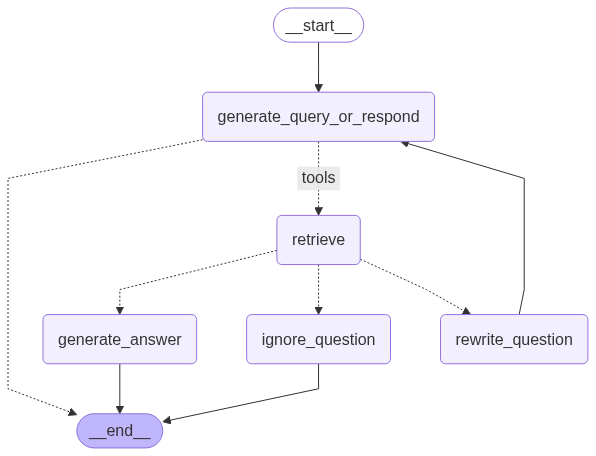

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "How was cricket spread in India?",
            }
        ]
    }
):
  for node, update in chunk.items():
        print("Update from node:", node)
        last_msg = update.get("messages", [])[-1]
        if hasattr(last_msg, "pretty_print"):
            last_msg.pretty_print()
        else:
            print(last_msg)
        print("\n\n")

Update from node: generate_query_or_respond
================================== Ai Message ==================================
Tool Calls:
  search_docs (call_t9Vl2nzLcBIOlRiEvsJmheFI)
 Call ID: call_t9Vl2nzLcBIOlRiEvsJmheFI
  Args:
    query: spread of cricket in India



Update from node: retrieve
================================= Tool Message =================================
Name: search_docs





Update from node: ignore_question
{'role': 'user', 'content': 'The question is not related to the document provided.'}



